In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data=fetch_california_housing()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df["MedHouseValue"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


In [4]:
df.duplicated().sum()

np.int64(0)

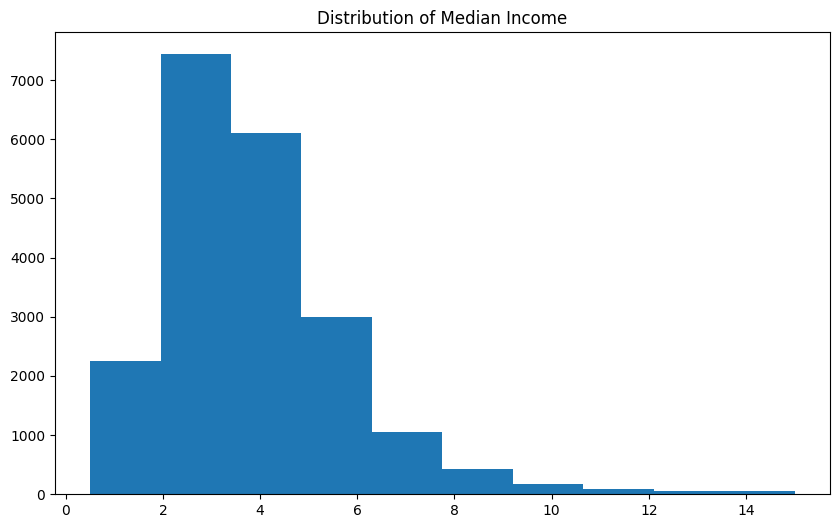

In [5]:
plt.figure(figsize=(10,6))
plt.hist(df['MedInc'])
plt.title('Distribution of Median Income')

plt.show()

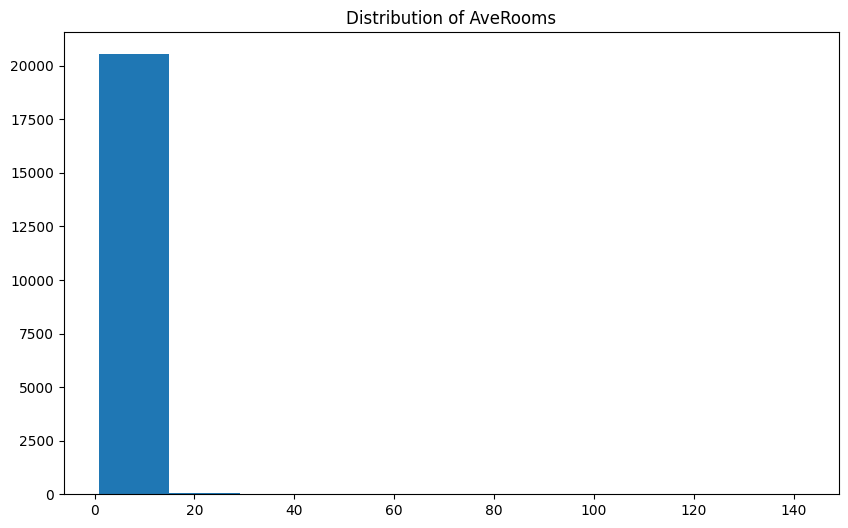

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df['AveRooms'])
plt.title('Distribution of AveRooms')

plt.show()

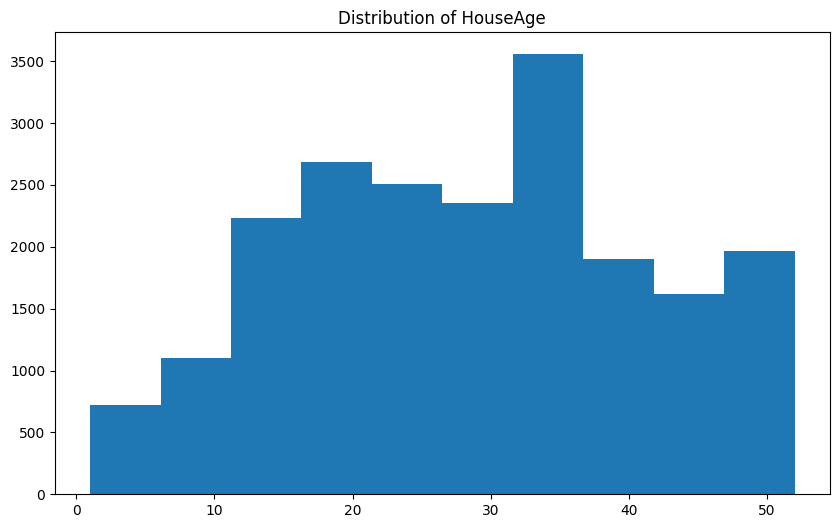

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df['HouseAge'])
plt.title('Distribution of HouseAge')

plt.show()

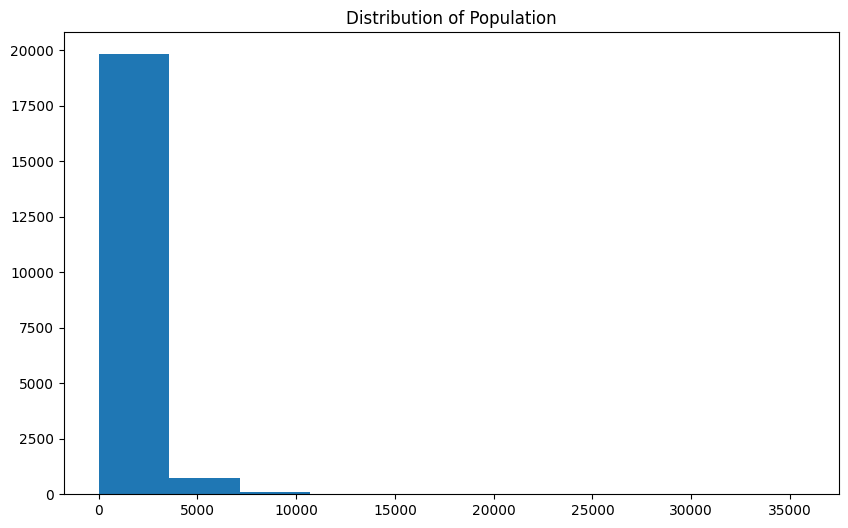

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['Population'])
plt.title('Distribution of Population')

plt.show()

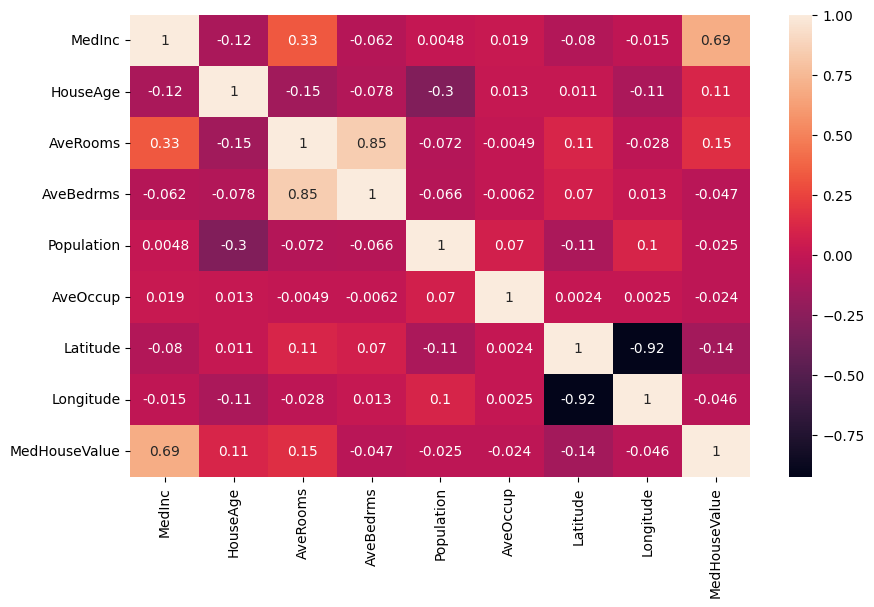

In [9]:
plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

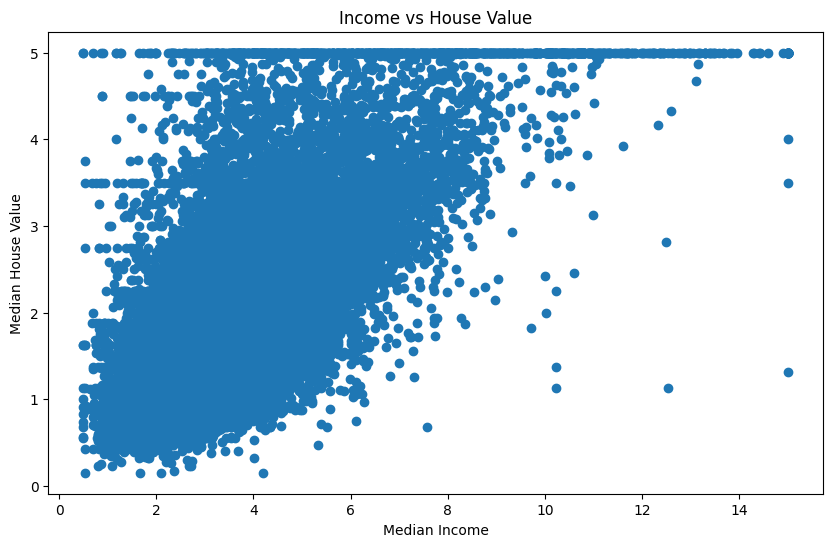

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x='MedInc',y='MedHouseValue',data=df)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')
plt.show()

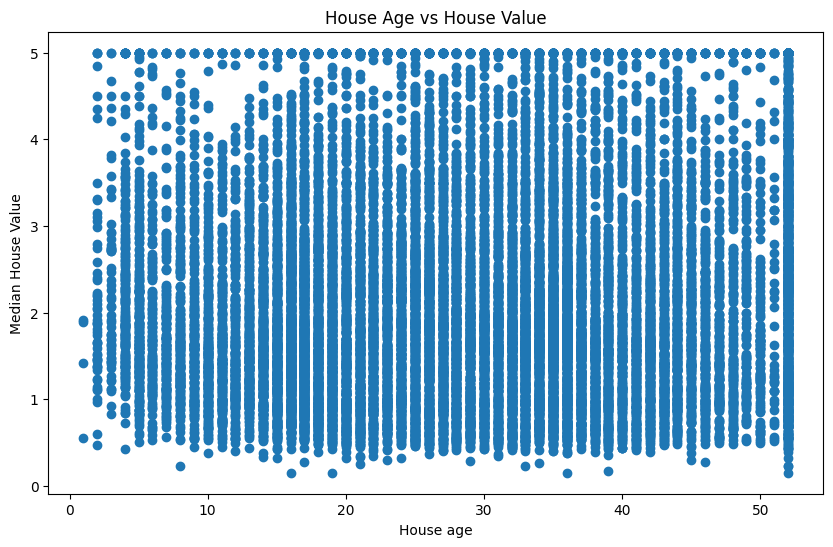

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x='HouseAge',y='MedHouseValue',data=df)
plt.xlabel('House age')
plt.ylabel('Median House Value')
plt.title('House Age vs House Value')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


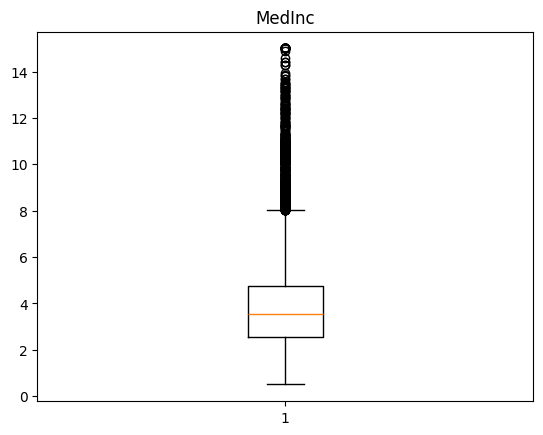

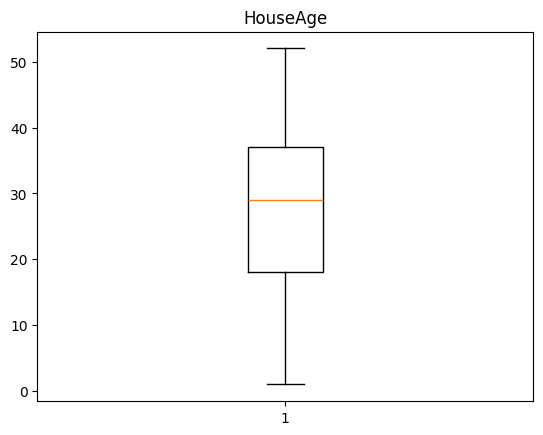

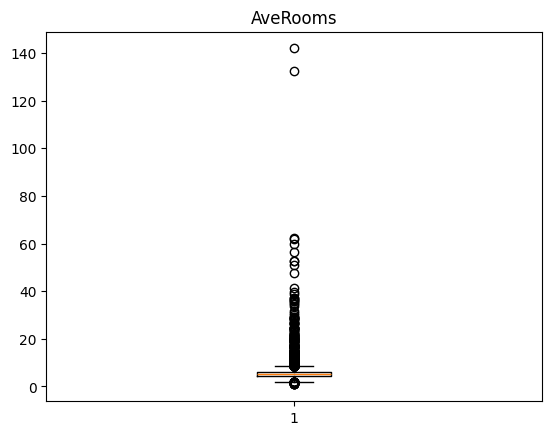

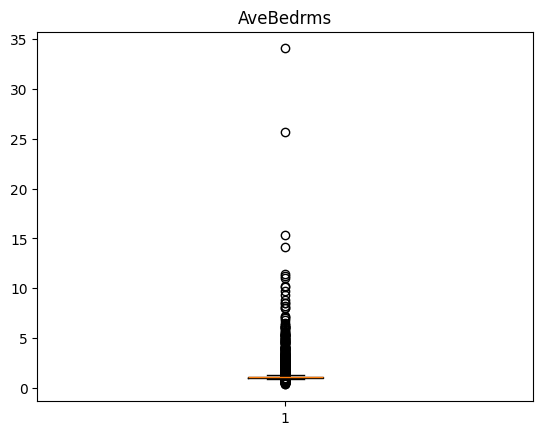

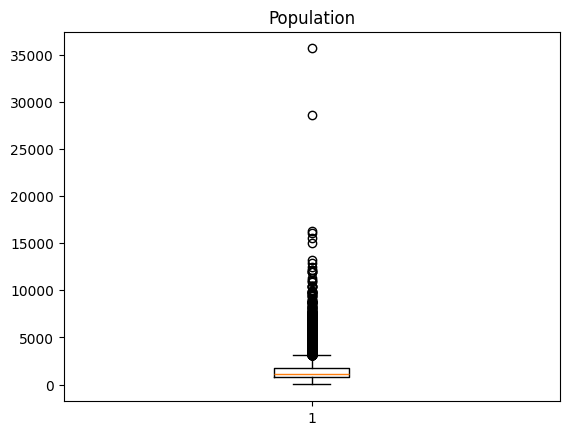

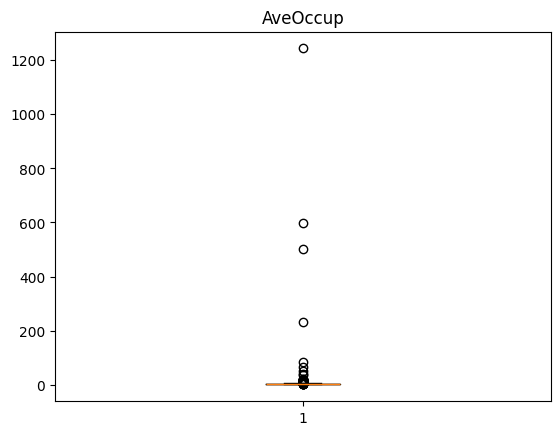

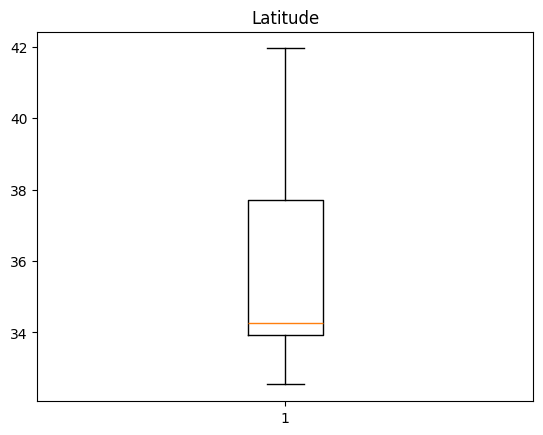

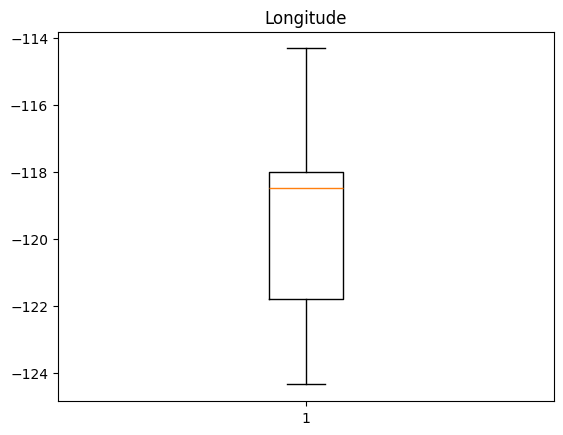

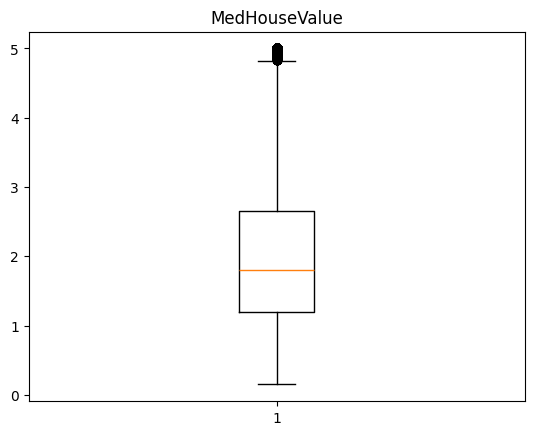

In [13]:
cols=list(df.columns)
for i in cols:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [14]:
X=df.drop('MedHouseValue',axis=1)
y=df['MedHouseValue']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE=",mse)
print("RSME=",np.sqrt(mse))
print("R2 score=",r2_score(y_test,y_pred))

MSE= 0.5558915986952443
RSME= 0.7455813830127763
R2 score= 0.5757877060324508


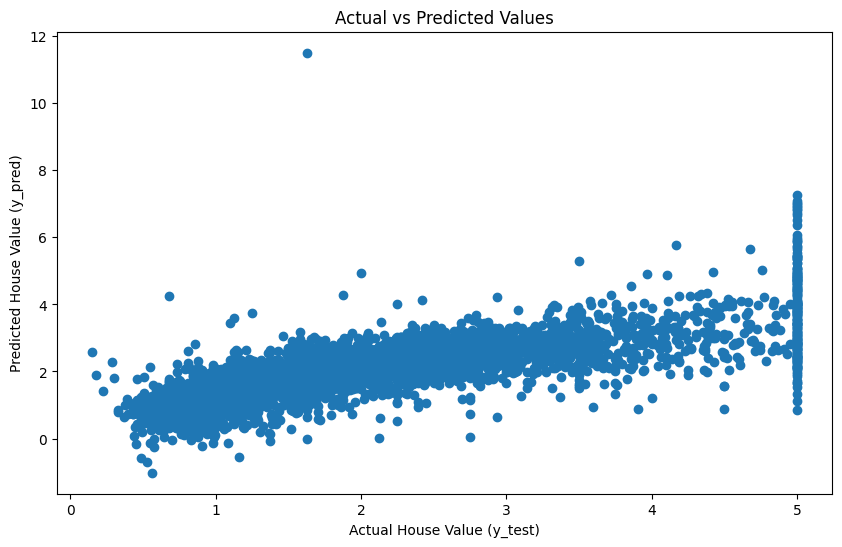

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual House Value (y_test)")
plt.ylabel("Predicted House Value (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

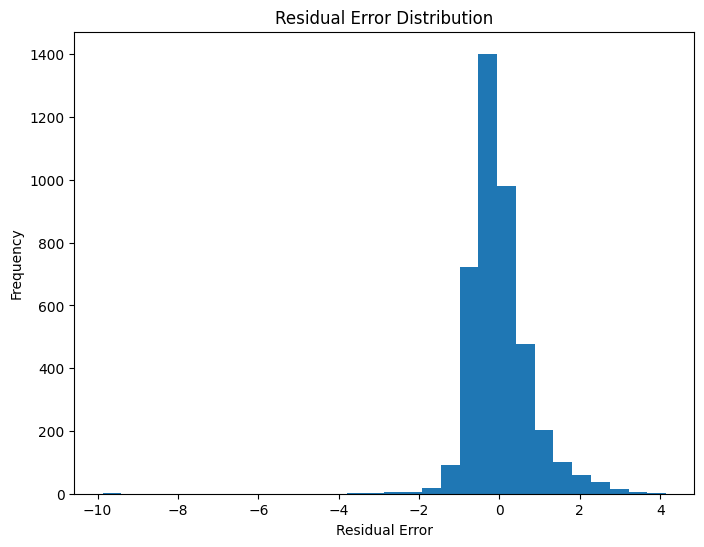

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30)
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()


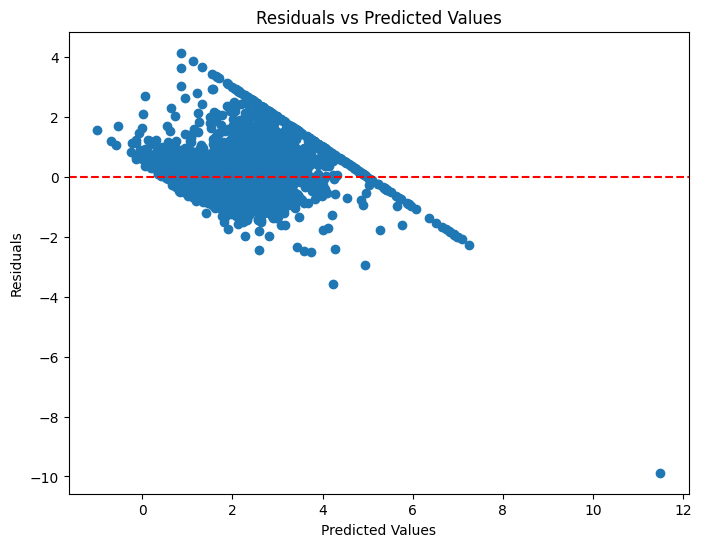

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
rf=RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=1 ,
    random_state=42
)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [21]:
rf_mse=mean_squared_error(y_test,rf_pred)
rf_rsme=np.sqrt(rf_mse)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print("MSE=",rf_mse)
print("RSME=",rf_rsme)
print("MAE=",rf_mae)
print("R2 score=",rf_r2)

MSE= 0.2728434915262355
RSME= 0.5223442270440399
MAE= 0.3456896527779479
R2 score= 0.7917875288884985


random Forest importances features


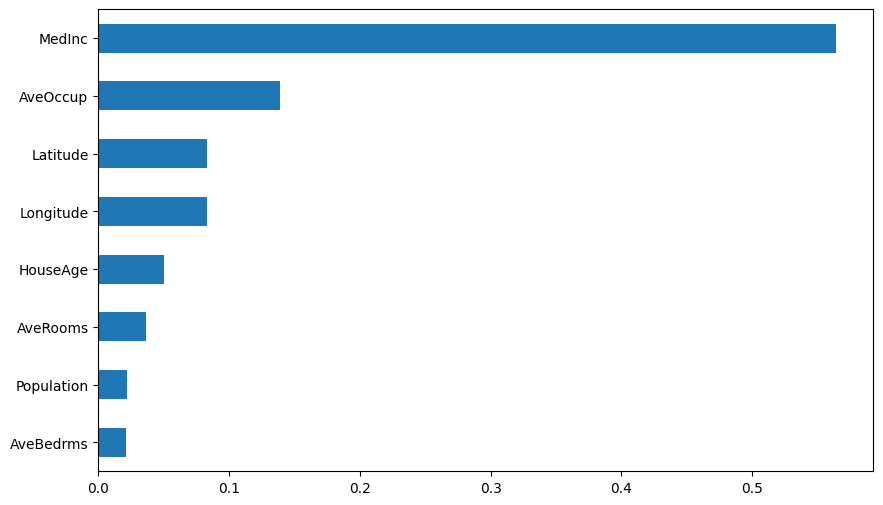

In [22]:
importances=pd.Series(rf.feature_importances_,index=df.columns[:-1])
importances.sort_values().plot(kind='barh',figsize=(10,6))
print("random Forest importances features")
plt.show()

In [23]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

In [24]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

xgb_mae, xgb_rmse, xgb_r2


(0.3095560662054715, np.float64(0.46498356263272245), 0.8350059278372314)

In [26]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [8, 12, 16],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
grid_rf.best_params_


{'max_depth': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [27]:
xgb_params = {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_xgb.fit(X_train_scaled, y_train)
grid_xgb.best_params_


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}

In [33]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae, rf_mae, xgb_mae],
    'RMSE': [rmse, rf_rsme, xgb_rmse],
    'R2': [r2, rf_r2, xgb_r2]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,0.533200,0.745581,0.575788
1,Random Forest,0.345690,0.522344,0.791788
2,XGBoost,0.309556,0.464984,0.835006


In [34]:
results.sort_values('RMSE')


,Model,MAE,RMSE,R2
2,XGBoost,0.309556,0.464984,0.835006
1,Random Forest,0.345690,0.522344,0.791788
0,Linear Regression,0.533200,0.745581,0.575788
